<a href="https://colab.research.google.com/github/sree2712/Maxplain/blob/main/Maxplain_post_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

file_path = '/content/ED_German_v1.2_test.json'

with open(file_path, 'r') as f:
    data = json.load(f)

In [ ]:
dict1 = data['responses'][0]

In [ ]:
dict2 = data['responses'][1]
dict2

{'id. Response ID': '6',
 'submitdate. Date submitted': '2023-05-25 14:26:44',
 'lastpage. Last page': '6',
 'startlanguage. Start language': 'en',
 'seed. Seed': '113511892',
 'startdate. Date started': '2023-05-25 13:42:30',
 'datestamp. Date last action': '2023-05-25 14:26:44',
 'G04Q13.  Please mention your Prolific ID below. It will help us facilitate fair payments.   ': 'sj',
 "Q00.    What is the model's prediction for instance id 773?   💡Tip: You need to enter the exact keywords (underlined) that the model provides as an answer.  ": 'Bad Credit Risk',
 'G01Q02[SQ001].    Does the applicant with instance id 773 have a critical account or loan elsewhere?\xa0   💡Tip: Check the screenshot for relevant information. The value 1 means yes and 0 means no.\xa0   [Yes]': 'No',
 'G01Q02[SQ002].    Does the applicant with instance id 773 have a critical account or loan elsewhere?\xa0   💡Tip: Check the screenshot for relevant information. The value 1 means yes and 0 means no.\xa0   [No]': '

In [ ]:
# list of relevant question codes
keys_of_correct_ans = ['G01Q02[SQ001]','G01Q12[SQ002]','G01Q04[SQ002]','G01Q09[SQ002]','G01Q13[SQ002]','G02Q11[SQ001]','G02Q10[SQ001]','G02Q10[SQ002]','G03Q17.','G04Q16[SQ002]','G03Q05[SQ002]','G03Q06.','G03Q12[SQ001]','G04Q17.']

In [ ]:
keys_grp_times = ['groupTime6. Group time: Capability Assessment', 'groupTime11. Group time: Decision Support', 'groupTime10. Group time: Domain Learning']

In [ ]:
time_dict_list= []
for response in data['responses']:
  time_dict = {}
  id = response['G04Q13.  Please mention your Prolific ID below. It will help us facilitate fair payments.   ']
  if id != 'groundtruth':
    time_list = []
    for key in keys_grp_times:
      time_list.append(response[key])
    time_dict[id] = time_list

  time_dict_list.append(time_dict)


In [ ]:
time_dict_list

[{},
 {'sj': ['34.32', '933.28', '1614.23']},
 {'Atharv': ['466.88', '290.85', '181.52']},
 {'1234': ['482.04', '1269', '238.94']},
 {'test dont use this': ['6.04', None, None]},
 {'Rohan Chandrashekar': ['616.43', '504.26', '157.39']}]

In [ ]:
def getListOfMatches(dict1, dict2):
  matching_keys = [key for key, value in dict2.items() if key in dict1 and dict1[key] == value]
  return matching_keys


In [ ]:
mk = getListOfMatches(dict1, dict2)
mk

['G01Q02[SQ001].    Does the applicant with instance id 773 have a critical account or loan elsewhere?\xa0   💡Tip: Check the screenshot for relevant information. The value 1 means yes and 0 means no.\xa0   [Yes]',
 'G01Q12[SQ002].   What are the three most important features for determining whether applicant 773 is a good or bad credit risk?    [Loan amount, Critical account or loan elsewhere, age]',
 "G01Q04[SQ002]. \xa0 \xa0   Does the applicant have a better chance of being predicted as a good credit risk if he doesn't have a critical account or loan elsewhere?\xa0   💡Tip: Check the screenshot for relevant information. The value 1 means yes and 0 means no.   [better chances without critical account or loan elsewhere]",
 'G01Q09[SQ002]. \xa0   How confident is the model that applicant 386 is a bad credit risk?    [the model is fairly confident (more than 75%)]',
 'G01Q13[SQ002]. \xa0 \xa0   Which of the model predictions will you trust more? That of applicant 971 or applicant 196?   

In [ ]:
len(data['responses'])

6

In [ ]:
counter =0
for k in keys_of_correct_ans:
  if any(k in key for key in mk):
    counter += 1
        # Code to execute if the substring is found in any key
        # print(f"The substring '{substring}' is present in at least one key")


In [ ]:
counter

13

In [ ]:
def attentionChecker(qn_list):
  return 0

In [ ]:
def timePenaltyChecker():
  return 0

In [ ]:
# Example dictionary
data = {
    "key1": "value1",
    "key2": "value2",
    "key3": "value3"
}

# List of substrings to search
substrings = ["key", "value"]

# Iterate over each substring
for substring in substrings:
    # Check if the substring is present in any of the keys
    if any(substring in key for key in data.keys()):
        # Code to execute if the substring is found in any key
        print(f"The substring '{substring}' is present in at least one key")
    else:
        # Code to execute if the substring is not found in any key
        print(f"The substring '{substring}' is not present in any key")


The key 'key1' contains the substring(s): key
The key 'key2' contains the substring(s): key
The key 'key3' contains the substring(s): key


In [ ]:
# Two example dictionaries
dict1 = {"key1": "value1", "key2": "value2", "key3": "value3"}
dict2 = {"key1": "value1", "key2": "value4", "key5": "value5"}

# List of keys with matching key-value pairs
matching_keys = [key for key, value in dict1.items() if key in dict2 and dict2[key] == value]

print(f"Matching keys: {matching_keys}")


Matching keys: ['key1']


### TSV to XLSX

In [ ]:
import pandas as pd

def tsv_to_csv(input_file, output_file_xlsx):
    # Read TSV file into a DataFrame
    df = pd.read_csv(input_file, sep='\t')

    # Write DataFrame to CSV file
    # df.to_csv(output_file_csv, index=False)

    # Write DataFrame to Excel file (optional)
    df.to_excel(output_file_xlsx, index=False)

if __name__ == "__main__":
    input_tsv_file = '/content/ED_C_Accepted.tsv'
    # output_csv_file = 'output2.csv'
    output_xlsx_file = '/content/ED_C_Accepted.xlsx'

    tsv_to_csv(input_tsv_file, output_xlsx_file)


### Count incorrect answers

In [ ]:
import pandas as pd
# Specify the file path of your XLSX file
file_path = "/content/Maxplain _ Results (1).xlsx"

# Read a specific sheet by sheet name
df_ED_G = pd.read_excel(file_path, sheet_name="NiXAI - German")
df_ED_C = pd.read_excel(file_path, sheet_name="NiXAI - Compas")
df_TTM_G = pd.read_excel(file_path, sheet_name="iXAI - German")
df_TTM_C = pd.read_excel(file_path, sheet_name="iXAI - Compas")

In [ ]:
df_TTM_C.head(5)

In [ ]:
# Define the substring of the column name you want to find
def col_num_finder(substring, df):
  # substring = 'G00Q01'
  # print(substring)
  # Get the column number for the column containing the substring
  column_number = df.columns.get_loc([col for col in df.columns if substring in col][0])
  # print(column_number)
  return column_number
  # print("Column number for substring '{}': {}".format(substring, column_number))

In [ ]:
def cols_finder(col_interest_names, df):
  cols_num_interest = []
  for col in col_interest_names:
    col_num = col_num_finder(col, df)
    cols_num_interest.append(col_num)
  return cols_num_interest

In [ ]:
def cell_compare(df, row1, row2, col):
  # Access the cells for the given row and column numbers
  cell1_value = df.iloc[row1, col]
  cell2_value = df.iloc[row2, col]

  # Compare the two cells
  if cell1_value == cell2_value:
      return 0
  else:
      return 1

In [ ]:
col_interest_ED_G = ['G01Q01[SQ001]', 'G01Q02[SQ002]', 'G01Q03[SQ002]', 'G01Q04[SQ002]', 'G02Q01[SQ002]', 'G02Q02[SQ001]', 'G02Q03[SQ001]', 'G02Q04[SQ002]', 'G03Q01[SQ001]',
                     'G03Q02[SQ002]', 'G03Q03[SQ002]', 'G03Q04[SQ002]', 'G03Q05[SQ001]']

col_interest_ED_C = ['G01Q01[SQ002]', 'G01Q02[SQ002]', 'G01Q03[SQ002]', 'G01Q04[SQ001]', 'G02Q01[SQ001]', 'G02Q02[SQ002]', 'G02Q03[SQ002]', 'G02Q04[SQ001]', 'G03Q01[SQ001]',
                     'G03Q02[SQ002]', 'G03Q03[SQ001]', 'G03Q04[SQ001]', 'G03Q05[SQ001]']

col_interest_TTM_G = ['G01Q01[SQ001]', 'G01Q02[SQ002]', 'G01Q03[SQ001]', 'G01Q04[SQ002]', 'G01Q05[SQ002]', 'G02Q01[SQ002]', 'G02Q02[SQ001]', 'G02Q03[SQ002]', 'G02Q04[SQ001]',
                      'G02Q05[SQ001]', 'G03Q01[SQ002]', 'G03Q02[SQ002]', 'G03Q04[SQ001]', 'G03Q04[SQ001]', 'G03Q05[SQ001]', 'G03Q06[SQ002]', 'G03Q07[SQ001]']

col_interest_TTM_C = ['G01Q01[SQ001]', 'G01Q02[SQ003]', 'G01Q03[SQ002]', 'G01Q04[SQ002]', 'G01Q05[SQ001]', 'G02Q01[SQ001]', 'G02Q02[SQ002]', 'G02Q03[SQ002]', 'G02Q04[SQ002]',
                      'G02Q05[SQ002]', 'G03Q01[SQ002]', 'G03Q02[SQ003]', 'G03Q03[SQ001]', 'G03Q04[SQ001]', 'G03Q05[SQ001]', 'G03Q06[SQ001]', 'G03Q07[SQ001]']

In [ ]:
def get_diff(df, cols_num_int, last_row):
  differences = []
  for row in range(1,last_row+1):
    diff= 0
    for col in cols_num_int:
      diff += cell_compare(df, 0,row,col)
    differences.append(diff)
  return differences

In [ ]:
def diff_csv(differences, filename):
  import csv
  # Write the array to a CSV file
  with open(filename, 'w', newline='') as csvfile:
      csvwriter = csv.writer(csvfile)
      for item in differences:
          csvwriter.writerow([item])

In [ ]:
cols_num_int_ED_G = cols_finder(col_interest_ED_G, df_ED_G)
print(cols_num_int_ED_G)

[8, 11, 14, 18, 20, 23, 25, 28, 29, 32, 34, 36, 41]


In [ ]:
differences_ED_G = get_diff(df_ED_G, cols_num_int_ED_G, 26)
diff_csv(differences_ED_G, 'ED_G_incorrect_ans.csv')
print(differences_ED_G)

[2, 1, 4, 2, 1, 1, 7, 2, 0, 3, 5, 4, 8, 8, 6, 6, 2, 3, 3, 1, 2, 2, 4, 1, 3, 6]


In [ ]:
cols_num_int_ED_C = cols_finder(col_interest_ED_C, df_ED_C)
print(cols_num_int_ED_C)

[9, 14, 17, 18, 20, 23, 27, 28, 30, 33, 34, 39, 42]


In [ ]:
differences_ED_C = get_diff(df_ED_C, cols_num_int_ED_C, 27)
diff_csv(differences_ED_C, 'ED_C_incorrect_ans.csv')
print(differences_ED_C)

[4, 1, 5, 1, 5, 1, 1, 2, 3, 1, 0, 7, 1, 1, 2, 0, 2, 4, 2, 1, 3, 3, 7, 2, 7, 2, 5]


In [ ]:
cols_num_int_TTM_G = cols_finder(col_interest_TTM_G, df_TTM_G)
print(cols_num_int_TTM_G)

[8, 11, 16, 19, 21, 23, 27, 30, 31, 33, 36, 38, 42, 42, 46, 49, 50]


In [ ]:
differences_TTM_G = get_diff(df_TTM_G, cols_num_int_TTM_G, 27)
diff_csv(differences_TTM_G, 'TTM_G_incorrect_ans.csv')
print(differences_TTM_G)

[1, 1, 5, 2, 2, 2, 3, 2, 1, 3, 4, 3, 2, 3, 1, 4, 5, 4, 3, 2, 3, 4, 3, 2, 2, 1, 3]


In [ ]:
cols_num_int_TTM_C = cols_finder(col_interest_TTM_C, df_TTM_C)
print(cols_num_int_TTM_C)

[8, 12, 17, 19, 20, 22, 28, 30, 32, 34, 36, 39, 40, 42, 47, 49, 52]


In [ ]:
differences_TTM_C = get_diff(df_TTM_C, cols_num_int_TTM_C, 26)
diff_csv(differences_TTM_C, 'TTM_C_incorrect_ans.csv')
print(differences_TTM_C)

[2, 1, 5, 0, 2, 4, 0, 1, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 0, 1, 2, 4, 2, 4, 1, 1]


### Hypothesis Testing

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

In [ ]:
ED = np.array([
    84.61538462, 92.30769231, 69.23076923, 84.61538462, 92.30769231, 92.30769231,
    46.15384615, 84.61538462, 100, 76.92307692, 61.53846154, 69.23076923,
    38.46153846, 38.46153846, 53.84615385, 53.84615385, 84.61538462, 76.92307692,
    76.92307692, 92.30769231, 84.61538462, 84.61538462, 69.23076923, 92.30769231,
    76.92307692, 53.84615385, 69.23076923, 92.30769231, 61.53846154, 92.30769231,
    61.53846154, 92.30769231, 92.30769231, 84.61538462, 76.92307692, 92.30769231,
    100, 46.15384615, 92.30769231, 92.30769231, 84.61538462, 100, 84.61538462,
    69.23076923, 84.61538462, 92.30769231, 76.92307692, 76.92307692, 46.15384615,
    84.61538462, 46.15384615, 84.61538462, 61.53846154
])

In [ ]:
ttm = np.array([94.11764706, 94.11764706, 70.58823529, 88.23529412, 88.23529412,
       88.23529412, 82.35294118, 88.23529412, 94.11764706, 82.35294118,
       76.47058824, 82.35294118, 88.23529412, 82.35294118, 94.11764706,
       76.47058824, 70.58823529, 76.47058824, 82.35294118, 88.23529412,
       82.35294118, 76.47058824, 82.35294118, 88.23529412, 88.23529412,
       94.11764706, 82.35294118, 88.23529412, 94.11764706, 70.58823529,
       100, 88.23529412, 76.47058824, 100, 94.11764706, 100, 100, 88.23529412,
       100, 88.23529412, 100, 82.35294118, 88.23529412, 94.11764706, 100, 100,
       94.11764706, 88.23529412, 76.47058824, 88.23529412, 76.47058824,
       94.11764706, 94.11764706,])


In [ ]:
statistic, p_value = mannwhitneyu(ttm, ED, alternative='Greater')

In [ ]:
# Print the results
print("Statistic:", statistic)
print("One-sided p-value:", p_value)

# Check if the result is statistically significant at a significance level of 0.05
if p_value < 0.05:
    print("Reject the null hypothesis. Group B is statistically better than Group A.")
else:
    print("Fail to reject the null hypothesis. There is no sufficient evidence to conclude that Group B is better than Group A.")

Statistic: 1922.0
One-sided p-value: 0.0005140196096341286
Reject the null hypothesis. Group B is statistically better than Group A.


In [ ]:
from scipy.stats import shapiro
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(ED)

# Check if data is normal based on p-value
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")

The data is not normally distributed.


### UES Data Processing

In [ ]:
def get_UES_viz(df_UES, start_col):
  results = {}
  for i in range(1,5):
    cat_counts_per = df_UES.iloc[:, i+start_col].value_counts(normalize=True) * 100
    cat_counts_per = cat_counts_per.round(2)
    cat_counts_dict = cat_counts_per.to_dict()
    arr_cat_count = []
    arr_cat_count.append(cat_counts_dict['strongly disagree'] if 'strongly disagree' in cat_counts_dict else 0)
    arr_cat_count.append(cat_counts_dict['disagree'] if 'disagree' in cat_counts_dict else 0)
    arr_cat_count.append(cat_counts_dict['neutral'] if 'neutral' in cat_counts_dict else 0)
    arr_cat_count.append(cat_counts_dict['agree'] if 'agree' in cat_counts_dict else 0)
    arr_cat_count.append(cat_counts_dict['strongly agree'] if 'strongly agree' in cat_counts_dict else 0)
    key = 'Q '+str(i)
    value = arr_cat_count
    # print(arr_cat_count)
    results[key] = value
  print(results)
  return results

In [ ]:
cols_with_likert_data = ['G04Q02[SQ001]', 'G04Q02[SQ002]', 'G04Q02[SQ003]', 'G04Q02[SQ004]']
print(cols_finder(cols_with_likert_data, df_ED_G))

[51, 52, 53, 54]


In [ ]:
results_TTM_G = get_UES_viz(df_TTM_G, 56)
results_TTM_C = get_UES_viz(df_TTM_C, 59)
results_ED_G = get_UES_viz(df_ED_G, 50)
results_ED_C = get_UES_viz(df_ED_C, 50)

In [ ]:
results_q1 = {}
results_q1['TTM_G'] = results_TTM_G['Q 1']
results_q1['TTM_C'] = results_TTM_C['Q 1']
results_q1['ED_G'] = results_ED_G['Q 1']
results_q1['ED_C'] = results_ED_C['Q 1']

In [ ]:
results_q2 = {}
results_q2['TTM_G'] = results_TTM_G['Q 2']
results_q2['TTM_C'] = results_TTM_C['Q 2']
results_q2['ED_G'] = results_ED_G['Q 2']
results_q2['ED_C'] = results_ED_C['Q 2']

In [ ]:
results_q3 = {}
results_q3['TTM_G'] = results_TTM_G['Q 3']
results_q3['TTM_C'] = results_TTM_C['Q 3']
results_q3['ED_G'] = results_ED_G['Q 3']
results_q3['ED_C'] = results_ED_C['Q 3']

In [ ]:
results_q4 = {}
results_q4['TTM_G'] = results_TTM_G['Q 4']
results_q4['TTM_C'] = results_TTM_C['Q 4']
results_q4['ED_G'] = results_ED_G['Q 4']
results_q4['ED_C'] = results_ED_C['Q 4']

{'Q 1': [7.41, 22.22, 25.93, 40.74, 3.7], 'Q 2': [3.7, 25.93, 14.81, 44.44, 11.11], 'Q 3': [11.11, 48.15, 25.93, 14.81, 0], 'Q 4': [0, 18.52, 33.33, 44.44, 3.7]}


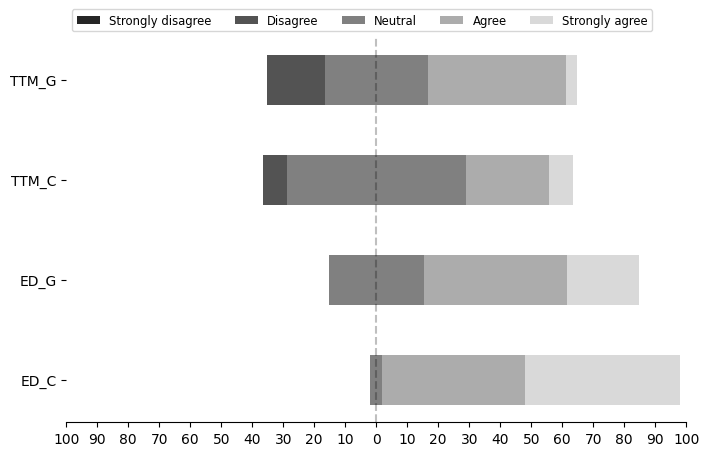

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neutral', 'Agree', 'Strongly agree']
# results = {
#     'Question 1': [10, 15, 17, 32, 26],
#     'Question 2': [26, 22, 29, 10, 13],
#     'Question 3': [35, 37, 7, 2, 19],
#     'Question 4': [32, 11, 9, 15, 33],
# }
results = get_UES_viz(df_TTM_G, 56)

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap('gray')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-100, 100)
    ax.set_xticks(np.arange(-100, 101, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Legend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(results_q4, category_names)
# plt.show()
fig.tight_layout()
# Save the plot as a high-quality PDF file
plt.savefig('UES_q4.pdf', dpi=300)